In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [2]:
df = pd.read_csv("/shared/3/projects/newsDiffusion/data/interim/NEREmbedding/headTailMerged.tsv", sep="\t") 

<ipython-input-2-648cd93f803b>:1: DtypeWarning: Columns (4,5,12,13,15,16,19,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/shared/3/projects/newsDiffusion/data/interim/NEREmbedding/headTailMerged.tsv", sep="\t")


In [40]:
#get the keys for the cleaned rows we are interested in 
ARTICLES_PATH = "/shared/3/projects/newsDiffusion/data/processed/fullDataWith20000.tsv"

artDf = pd.read_csv(ARTICLES_PATH, sep="\t")
artDf = artDf.drop(columns=["Unnamed: 0"])

#important: remove any dates before our first local date 
artDf =  artDf[artDf["date"] >= "2020-04-01"]

<ipython-input-40-e65603079937>:4: DtypeWarning: Columns (4,5,12,13,15,16,19) have mixed types. Specify dtype option on import or set low_memory=False.
  artDf = pd.read_csv(ARTICLES_PATH, sep="\t")


In [43]:
cleanKeys = artDf["key"]

In [47]:
df = df.set_index("key")

In [49]:
cleanDf = df.loc[cleanKeys]

In [50]:
len(cleanDf)

4228898

In [51]:
contentLens = cleanDf.dropna(subset=["content"])["content"].apply(lambda x: len(x.split()))
truncLens = cleanDf.dropna(subset=["headTail"])["headTail"].apply(lambda x: len(x.split()))

In [82]:
np.median(contentLens)

467.0

In [83]:
np.median(truncLens)

317.0

In [54]:
contentLens = list(contentLens)

In [55]:
truncLens = list(truncLens)

In [69]:
tab10 = sns.color_palette("tab10")

colNames = ["blue", "orange", "green", "red", "purple", "brown", "pink", "grey", "yellow", "turqoise"]
colDict = dict(zip(colNames, tab10))

In [76]:
FIG_PATH = "/home/blitt/projects/localNews/reports/figures/drafts/"

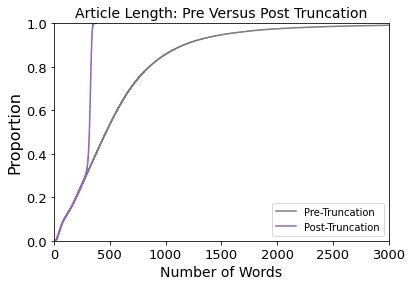

In [84]:
fig, ax = plt.subplots()
#list(random.sample(contentLens, 4000))
sns.ecdfplot(contentLens, ax=ax, label="Pre-Truncation", color=colDict["grey"])

#list(random.sample(truncLens, 4000))
sns.ecdfplot(truncLens, ax=ax, label="Post-Truncation", color=colDict["purple"])
plt.xlim(0, 3000)
ax.set_title("Article Length: Pre Versus Post Truncation", fontsize=14)
ax.set_xlabel("Number of Words", fontsize=14)
ax.set_ylabel("Proportion", fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=13)
plt.legend()
plt.savefig(FIG_PATH + "documentLengthCDF.pdf", bbox_inches="tight")

In [85]:
FIG_PATH + "documentLengthCDF.pdf"

'/home/blitt/projects/localNews/reports/figures/drafts/documentLengthCDF.pdf'